### Homework 4

### Pratik Anand (pratik@vt.edu) , Harsh Chaturvedi (charsh7@vt.edu)

In [13]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# reading in the CSV data
data = pd.read_csv('cereal.txt', delim_whitespace = True, nrows=22)
data.head(25)

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Shelf,Potass,Vitamins
0,110,2,2,180,1.5,10.5,10,1,70,25
1,130,3,2,210,2.0,18.0,8,3,100,25
2,110,6,2,290,2.0,17.0,1,1,105,25
3,120,1,3,210,0.0,13.0,9,2,45,25
4,110,3,2,140,2.0,13.0,7,3,105,25
5,110,1,1,180,0.0,12.0,13,2,55,25
6,110,1,1,180,0.0,12.0,13,2,65,25
7,100,2,1,140,2.0,11.0,10,3,120,25
8,110,1,1,280,0.0,15.0,9,2,45,25
9,110,3,1,250,1.5,11.5,10,1,90,25


In [15]:
from sklearn.manifold import MDS
mds = MDS()

In [18]:
transformed = mds.fit_transform(data)
transformed

array([[  19.22967723,  -17.3460874 ],
       [ -16.48882088,    7.33197279],
       [ -33.80174262,   86.95903527],
       [  35.80150243,   18.62974826],
       [  -2.26708909,  -64.58378242],
       [  33.26706451,  -14.7201317 ],
       [  24.18356595,  -16.39806917],
       [ -15.73510331,  -70.34271754],
       [  22.13403032,   87.52025794],
       [ -12.51312679,   48.95665164],
       [  30.4337519 ,   69.56431612],
       [  33.06901026,  -14.43975197],
       [  -6.02627389,   20.11470725],
       [ -26.10324544,  -40.23491453],
       [ -33.48213444,  -76.72410397],
       [  85.85326037,   16.23427595],
       [-156.42289947,  -46.38774907],
       [ -67.93102288,    4.0362357 ],
       [  14.81140043,   55.06866652],
       [  69.51141363,  -50.4698317 ],
       [ -21.53533253,   -7.55202615],
       [  24.01211432,    4.78329819]])

## MDS of the cereal data

<IPython.core.display.Javascript object>


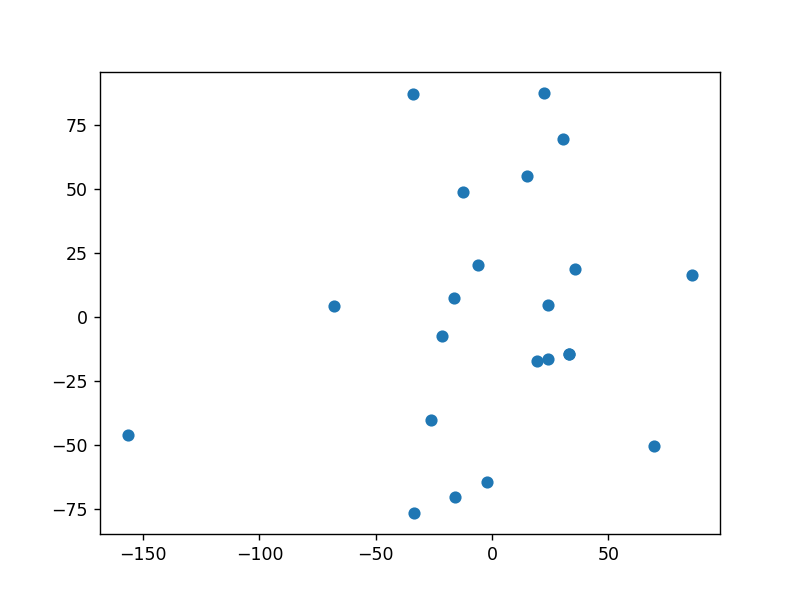

In [20]:
fig,ax = plt.subplots()
ax.scatter(transformed[:, 0], transformed[:, 1])
fig.show()

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [22]:
transformed_pca = pca.fit_transform(data)
transformed_pca

array([[  -1.91211537,  -27.28469186],
       [   4.94273219,   15.08569628],
       [ -39.14740249,   81.03216973],
       [ -38.6241775 ,  -15.8587858 ],
       [  48.80184737,  -40.27443371],
       [ -13.66050408,  -35.53257661],
       [  -5.82023734,  -30.09359508],
       [  60.14154474,  -33.06621583],
       [ -80.14422657,   39.8766267 ],
       [ -27.17549001,   40.06618385],
       [ -72.67672998,   21.47870993],
       [ -13.68051064,  -35.48126723],
       [ -10.37130582,   15.3845488 ],
       [  44.16638144,   -6.51433267],
       [  75.79927074,  -22.11376256],
       [ -26.74365903,  -13.54737359],
       [ 134.14090451,   86.19551887],
       [  31.70627518,   26.36503278],
       [ -51.14236104,   24.29472455],
       [ -13.84836471,  -84.01869644],
       [  16.89687598,   10.34913148],
       [ -21.64874756,  -16.34261161]])

## 2-D PCA

<IPython.core.display.Javascript object>


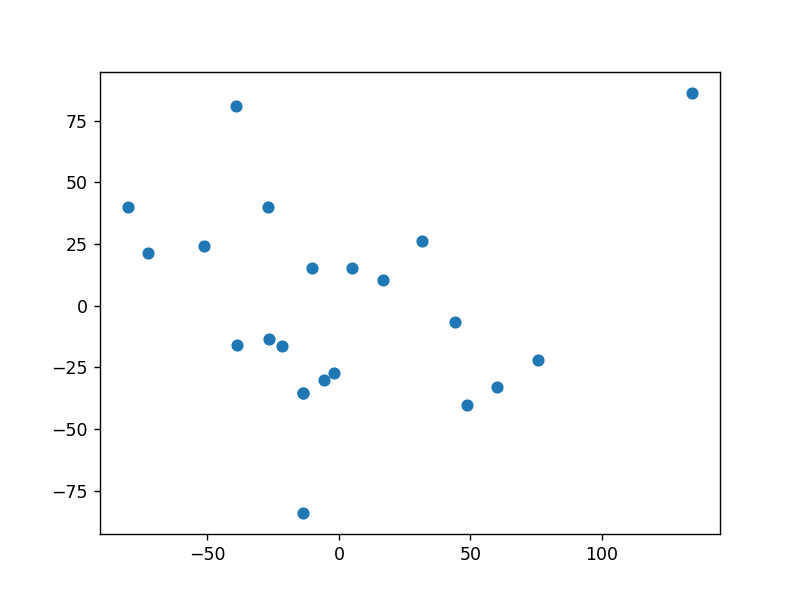

In [23]:
fig,ax = plt.subplots()
ax.scatter(transformed_pca[:, 0], transformed_pca[:, 1])
fig.show()

### Distance between points in MDS projection

In [27]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(transformed)

array([[   0.        ,   43.41448793,  117.01235022,   39.6091674 ,
          51.89904424,   14.2808923 ,    5.0437835 ,   63.49156388,
         104.90655676,   73.50958312,   87.62961559,   14.14121368,
          45.17935593,   50.78358283,   79.39952104,   74.60792608,
         178.03720345,   89.74514686,   72.54941595,   60.21158902,
          41.92504808,   22.64026085],
       [  43.41448793,    0.        ,   81.48746123,   53.49689377,
          73.30848179,   54.4237397 ,   47.08883033,   77.6783471 ,
          89.00497576,   41.81411284,   77.93967149,   54.12935088,
          16.51857106,   48.52881545,   85.75661343,  102.72853838,
         149.89114339,   51.54766755,   57.08323557,  103.6199254 ,
          15.71625606,   40.58104847],
       [ 117.01235022,   81.48746123,    0.        ,   97.53718872,
         154.78908219,  121.80672348,  118.51154816,  158.33586104,
          55.93858834,   43.55899821,   66.54904214,  121.46362272,
          72.38536352,  127.42671511, 

### Distance between the points in PCA projection

In [28]:
euclidean_distances(transformed_pca)

array([[  0.00000000e+00,   4.29213085e+01,   1.14538243e+02,
          3.84490160e+01,   5.23511166e+01,   1.43545199e+01,
          4.81283229e+00,   6.23224097e+01,   1.03106285e+02,
          7.19331534e+01,   8.59389320e+01,   1.43415123e+01,
          4.34996782e+01,   5.05434040e+01,   7.78832334e+01,
          2.83781513e+01,   1.77167103e+02,   6.33126302e+01,
          7.13025475e+01,   5.79760409e+01,   4.20723521e+01,
          2.25668733e+01],
       [  4.29213085e+01,   0.00000000e+00,   7.93276581e+01,
          5.34381567e+01,   7.06283652e+01,   5.39285634e+01,
          4.64436205e+01,   7.32496795e+01,   8.86249445e+01,
          4.06891258e+01,   7.78822928e+01,   5.38873174e+01,
          1.53169538e+01,   4.47778507e+01,   8.00278001e+01,
          4.27069090e+01,   1.47474657e+02,   2.90432551e+01,
          5.68361143e+01,   1.00870144e+02,   1.28583280e+01,
          4.11684993e+01],
       [  1.14538243e+02,   7.93276581e+01,   0.00000000e+00,
          9.6892

#### Since the distance between points in both 2-D MDS and 2-D PCA are nearly same,  we can conclude that they are using the similar metric for 2D projection of data which is distance between the points as similarity criteria.